## GRIP TASK1
Prediction using Supervised ML


In [2]:
import pandas as pd # storing and manipulating data\n
import numpy as np # mathematical computation on arrays and matrices \n
import seaborn as sns # visualisation\n
import matplotlib.pyplot as plt  # visualisation\n


In [3]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url)


In [4]:
data.head()
data.shape


(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 440.0 bytes


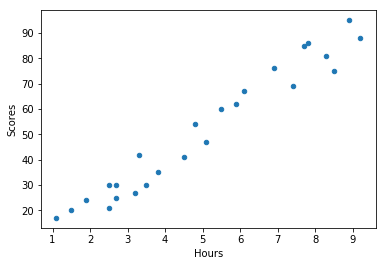

In [7]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()


In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours=data['Hours']
scores=data['Scores']

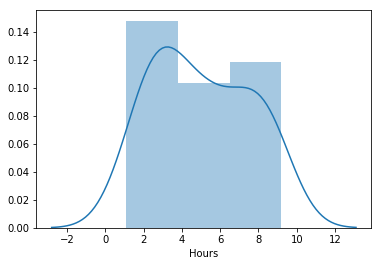

In [10]:
sns.distplot(hours)


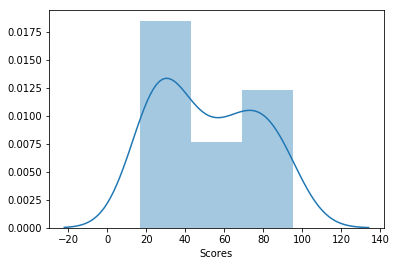

In [11]:
sns.distplot(scores)


In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values



In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=50)

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

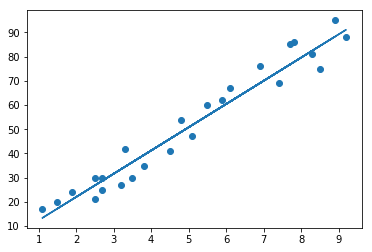

In [15]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [16]:
y_pred=reg.predict(x_test)

In [17]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


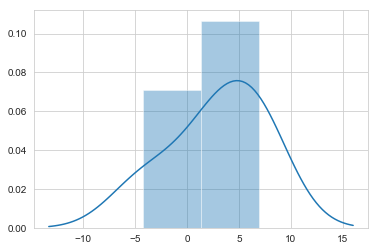

In [18]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

What should be the predicted value if a student studies for 9.25hours/day?


In [19]:
h=9.25
s=reg.predict([[h]])
print("if a student studies for {} hours/day then he/she will score {} % in exams.".format(h,s))

if a student studies for 9.25 hours/day then he/she will score [91.56986604] % in exams.


In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285


In [26]:
print("r2 Score:",r2_score(y_test,y_pred))

r2 Score: 0.971014141329942
